# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
data = pd.read_csv('players_20.csv')
data

,short_name,long_name,overall,value_eur,wage_eur,player_positions,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,Lionel Andrés Messi Cuccittini,94,95500000,565000,ATTACKER,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,93,58500000,405000,ATTACKER,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,Neymar da Silva Santos Junior,92,105500000,290000,ATTACKER,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,Jan Oblak,91,77500000,125000,GOALKEEPER,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,Eden Hazard,91,90000000,470000,ATTACKER,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,邵帅,48,40000,2000,DEFENDER,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,Mingjie Xiao,48,40000,2000,DEFENDER,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,张威,48,40000,1000,MIDFIELDER,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,汪海健,48,40000,1000,MIDFIELDER,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


# Data Analysis

In [ ]:
data.groupby(by='player_positions').median()

,overall,value_eur,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
player_positions,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ATTACKER,66,875000,4000,52,66,61,61,58,65,54,44,48,66,72,73,70,62,67,67,67,65,68,60,52,25,65,57,62,61,29,26,23,10,11,11,10,11
DEFENDER,66,675000,3000,54,33,62,61,33,55,41,35,55,59,66,67,62,62,63,51,70,68,71,36,66,64,45,46,42,59,64,66,65,11,10,10,10,10
GOALKEEPER,65,400000,2000,13,11,13,26,12,13,14,13,25,19,38,39,37,60,43,46,58,30,62,12,25,16,11,37,19,43,14,13,13,65,63,61,64,66
MIDFIELDER,66,800000,3000,59,56,52,67,50,65,58,52,63,67,69,68,71,63,71,64,63,69,63,58,59,53,60,63,54,62,52,55,52,10,11,10,10,10


[]

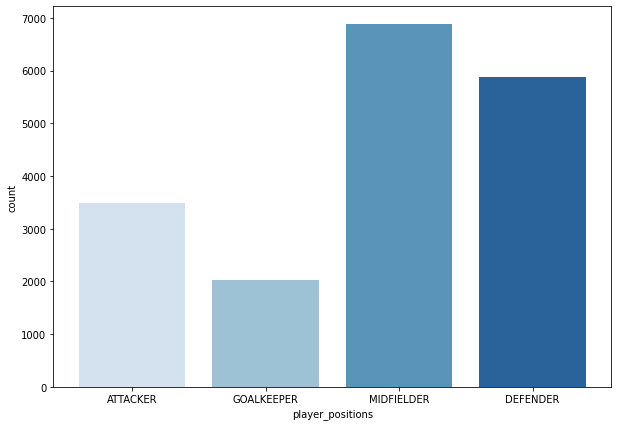

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='player_positions', palette='Blues')
plt.plot()

[]

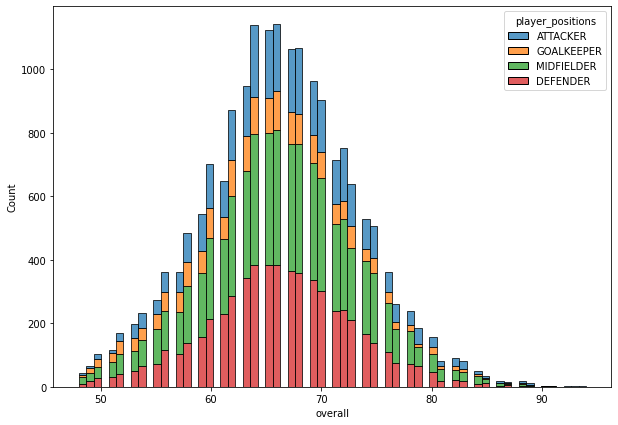

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=data, x='overall', hue='player_positions', multiple='stack')
plt.plot()

[]

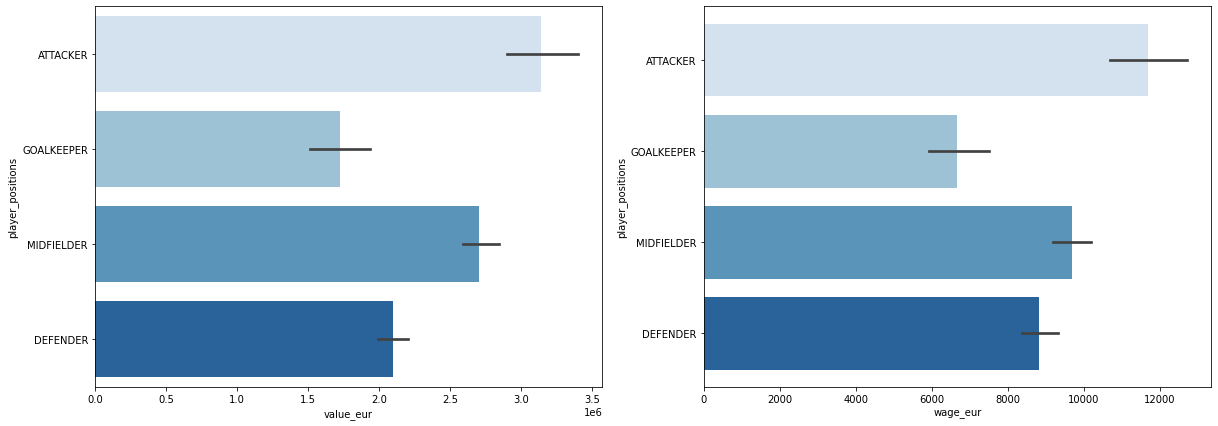

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.barplot(data=data, x='value_eur', y ='player_positions', palette='Blues')

plt.subplot(1,2,2)
sns.barplot(data=data, x='wage_eur', y ='player_positions', palette='Blues')
plt.plot()

# Data Preprocessing

In [ ]:
data['player_positions'] = data['player_positions'].map({'ATTACKER':0,
                                                         'GOALKEEPER':1,
                                                         'MIDFIELDER':2,
                                                         'DEFENDER':3})

In [ ]:
data.drop(['short_name','long_name','overall','value_eur','wage_eur'], axis=1, inplace=True)
data

,player_positions,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,1,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,3,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,3,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,2,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,2,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


In [ ]:
X = data.drop('player_positions', axis=1)
y = data[['player_positions']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr', max_iter=1000)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print('Model accuracy on training set: {:.2f}%'.format(score_train*100))
print('Model accuracy on testing set: {:.2f}%'.format(score_test*100))

Model accuracy on training set: 88.33%
Model accuracy on training set: 88.46%


# Testing

In [ ]:
test_data = {
    'attacking_crossing':13,
    'attacking_finishing':13,
    'attacking_heading_accuracy':17,
    'attacking_short_passing':26,
    'attacking_volleys':19,
    'skill_dribbling':18,
    'skill_curve':16,
    'skill_fk_accuracy':20,
    'skill_long_passing':22,
    'skill_ball_control':24,
    'movement_acceleration':43,
    'movement_sprint_speed':44,
    'movement_agility':34,
    'movement_reactions':49,
    'movement_balance':48,
    'power_shot_power':41,
    'power_jumping':56,
    'power_stamina':38,
    'power_strength':67,
    'power_long_shots':15,
    'mentality_aggression':18,
    'mentality_interceptions':25,
    'mentality_positioning':19,
    'mentality_vision':16,
    'mentality_penalties':21,
    'mentality_composure':25,
    'defending_marking':17,
    'defending_standing_tackle':18,
    'defending_sliding_tackle':13,
    'goalkeeping_diving':65,
    'goalkeeping_handling':60,
    'goalkeeping_kicking':55,
    'goalkeeping_positioning':55,
    'goalkeeping_reflexes':70
}

In [ ]:
test = pd.Series(test_data)
prediction = model.predict([test])[0]
if prediction == 0:
  print('Player should be a "Attacker"')
elif prediction == 1:
  print('Player should be a "Goalkeeper"')
elif prediction == 2:
  print('Player should be a "Midfielder"')
elif prediction == 3:
  print('Player should be a "Defender"')

Player should be a "Goalkeeper"
